In [93]:
import pandas as pd

# Load IoT sensor data from CSV (Generated in Homework 1)
df = pd.read_csv("IoT Simulated Data.csv")

# Display the first few rows
print(df.head())

   SensorID Location   Timestamp  Temperature (°C)  Humidity (%)  \
0         1     Asia  2025-01-01             16.20         55.27   
1         1     Asia  2025-02-01             16.95         66.36   
2         1     Asia  2025-03-01             21.37         66.04   
3         1     Asia  2025-04-01             20.09         60.50   
4         1     Asia  2025-05-01             21.60         56.10   

   Air Quality Index (AQI)  Soil Moisture (%)  Particulate Matter 2.5 (µg/m³)  \
0                       60              40.31                           32.22   
1                       67              37.16                           29.54   
2                       77              39.44                           34.45   
3                       79              41.53                           34.94   
4                       78              38.30                           32.13   

   Particulate Matter 10 (µg/m³)  Ozone Concentration (ppm)  \
0                          35.57         

In [94]:
from web3 import Web3

ganache_url = "http://127.0.0.1:7545"  # Change port if necessary
web3 = Web3(Web3.HTTPProvider(ganache_url))

if web3.is_connected():
    print("✅ Connected to Ganache successfully!")
else:
    print("❌ Connection failed. Ensure Ganache is running.")

✅ Connected to Ganache successfully!


In [95]:
import json

contract_address = "0xfa44e94e799159E0B13234Dc9B1074Af176a1614"

with open('abi.json') as f:
	abi = json.load(f)  # Replace with actual ABI JSON list

# Load the smart contract
contract = web3.eth.contract(address=contract_address, abi=abi)

# Set the default sender address (first account from Ganache)
web3.eth.default_account = web3.eth.accounts[0]


print(f"✅ Connected to Smart Contract at {contract_address}")

✅ Connected to Smart Contract at 0xfa44e94e799159E0B13234Dc9B1074Af176a1614


In [96]:
total_records = contract.functions.getTotalRecords().call()
print(f"Total Records: {total_records}")

Total Records: 0


In [97]:
import time

def send_iot_data(device_id, data_type, data_value):
    txn = contract.functions.storeData(device_id, data_type, data_value).transact({
        'from': web3.eth.default_account,
        'gas': 3000000
    })
    receipt = web3.eth.wait_for_transaction_receipt(txn)
    print(f"✅ Data Stored: {data_type} - {data_value}, Txn Hash: {receipt.transactionHash.hex()}")

In [98]:
sensor_fields = [
    'Temperature (°C)',
    'Humidity (%)',
    'Air Quality Index (AQI)',
    'Soil Moisture (%)',
    'Particulate Matter 2.5 (µg/m³)',
    'Particulate Matter 10 (µg/m³)',
    'Ozone Concentration (ppm)',
    'Nitrogen Dioxide (ppm)',
    'Sulfur Dioxide (ppm)',
    'Carbon Monoxide (ppm)'
]

# Only send the first 50 rows for testing
for i, row in enumerate(df.iterrows()):
    if i >= 50:
        break
    row = row[1]
    sensor_id = str(row["SensorID"])
    for field in sensor_fields:
        try:
            data_value = str(row[field])
            send_iot_data(sensor_id, field, data_value)
            time.sleep(1)
        except Exception as e:
            print(f"❌ Error sending {field} for {sensor_id}: {e}")

✅ Data Stored: Temperature (°C) - 16.2, Txn Hash: ca84a31cbae0de44a50f00bf3591571f0e7b805b82d6d3e5706badb6cb02cd36
✅ Data Stored: Humidity (%) - 55.27, Txn Hash: cd93a4a808e5faa7d9a3b86897d75c03d4afde401d681ec6642af2c2b8438da1
✅ Data Stored: Air Quality Index (AQI) - 60, Txn Hash: de0b1ae431a8e4eab4928a92016e7fac181b6b18a8a09083190e8d8740230a97
✅ Data Stored: Soil Moisture (%) - 40.31, Txn Hash: fa563e31b2752bf5e2cf9077dc4bef131964d7532455a3ee24b0da30a18f469f
✅ Data Stored: Particulate Matter 2.5 (µg/m³) - 32.22, Txn Hash: 4ff4f871e2e7238083a0c081ca5ee6c7672d2004f98546305a64d90d5160bf0b
✅ Data Stored: Particulate Matter 10 (µg/m³) - 35.57, Txn Hash: 342ab7c8ec0bee511b6de5456bae77c2d2927b731691b6299e31c0ca7d0f472f
✅ Data Stored: Ozone Concentration (ppm) - 0.0301, Txn Hash: 2d5880ec5cd96d721aeb007869b690059b35961439c6e21e780fa98ac9e7e3fb
✅ Data Stored: Nitrogen Dioxide (ppm) - 0.0191, Txn Hash: 6fd4f0223e5cbb395eea878f4fd7c92fd97b425593460e26b3f7662db2070ce3
✅ Data Stored: Sulfur Dioxid

In [99]:
total_records = contract.functions.getTotalRecords().call()
print(f"📦 Total IoT records stored: {total_records}")

📦 Total IoT records stored: 500


In [100]:
if total_records > 0:
    record = contract.functions.getRecord(0).call()
    print("📝 First Stored Record:", record)

📝 First Stored Record: [1750846281, '1', 'Temperature (°C)', '16.2']


In [101]:
import pandas as pd

# Retrieve all IoT records
data = []
for i in range(total_records):
    record = contract.functions.getRecord(i).call()
    data.append({
        "timestamp": record[0],
        "device_id": record[1],
        "data_type": record[2],
        "data_value": record[3]
    })

# Convert to a DataFrame
df = pd.DataFrame(data)

# Convert timestamp to readable format
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")

# Display first few records
print(df.head())

            timestamp device_id                       data_type data_value
0 2025-06-25 10:11:21         1                Temperature (°C)       16.2
1 2025-06-25 10:11:22         1                    Humidity (%)      55.27
2 2025-06-25 10:11:24         1         Air Quality Index (AQI)         60
3 2025-06-25 10:11:25         1               Soil Moisture (%)      40.31
4 2025-06-25 10:11:26         1  Particulate Matter 2.5 (µg/m³)      32.22


In [102]:
import numpy as np

# Extract numeric values from 'data_value' where applicable
df["numeric_value"] = df["data_value"].str.extract(r'(\d+\.?\d*)').astype(float)

# Handle missing values (if any)
df.fillna(0, inplace=True)

# Display cleaned data
print(df.head())

            timestamp device_id                       data_type data_value  \
0 2025-06-25 10:11:21         1                Temperature (°C)       16.2   
1 2025-06-25 10:11:22         1                    Humidity (%)      55.27   
2 2025-06-25 10:11:24         1         Air Quality Index (AQI)         60   
3 2025-06-25 10:11:25         1               Soil Moisture (%)      40.31   
4 2025-06-25 10:11:26         1  Particulate Matter 2.5 (µg/m³)      32.22   

   numeric_value  
0          16.20  
1          55.27  
2          60.00  
3          40.31  
4          32.22  


In [103]:
# Save cleaned IoT data to a CSV file
df.to_csv("Cleaned IoT Simulated Data.csv", index=False)

print("✅ Cleaned IoT data saved successfully as Cleaned IoT Data Simulation.csv")

✅ Cleaned IoT data saved successfully as Cleaned IoT Data Simulation.csv


In [104]:
import pandas as pd

# Load cleaned IoT data
df = pd.read_csv("Cleaned IoT Simulated Data.csv")

# Display first few rows to verify data
print(df.head())

             timestamp  device_id                       data_type  data_value  \
0  2025-06-25 10:11:21          1                Temperature (°C)       16.20   
1  2025-06-25 10:11:22          1                    Humidity (%)       55.27   
2  2025-06-25 10:11:24          1         Air Quality Index (AQI)       60.00   
3  2025-06-25 10:11:25          1               Soil Moisture (%)       40.31   
4  2025-06-25 10:11:26          1  Particulate Matter 2.5 (µg/m³)       32.22   

   numeric_value  
0          16.20  
1          55.27  
2          60.00  
3          40.31  
4          32.22  


In [105]:
# Convert timestamp column to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])

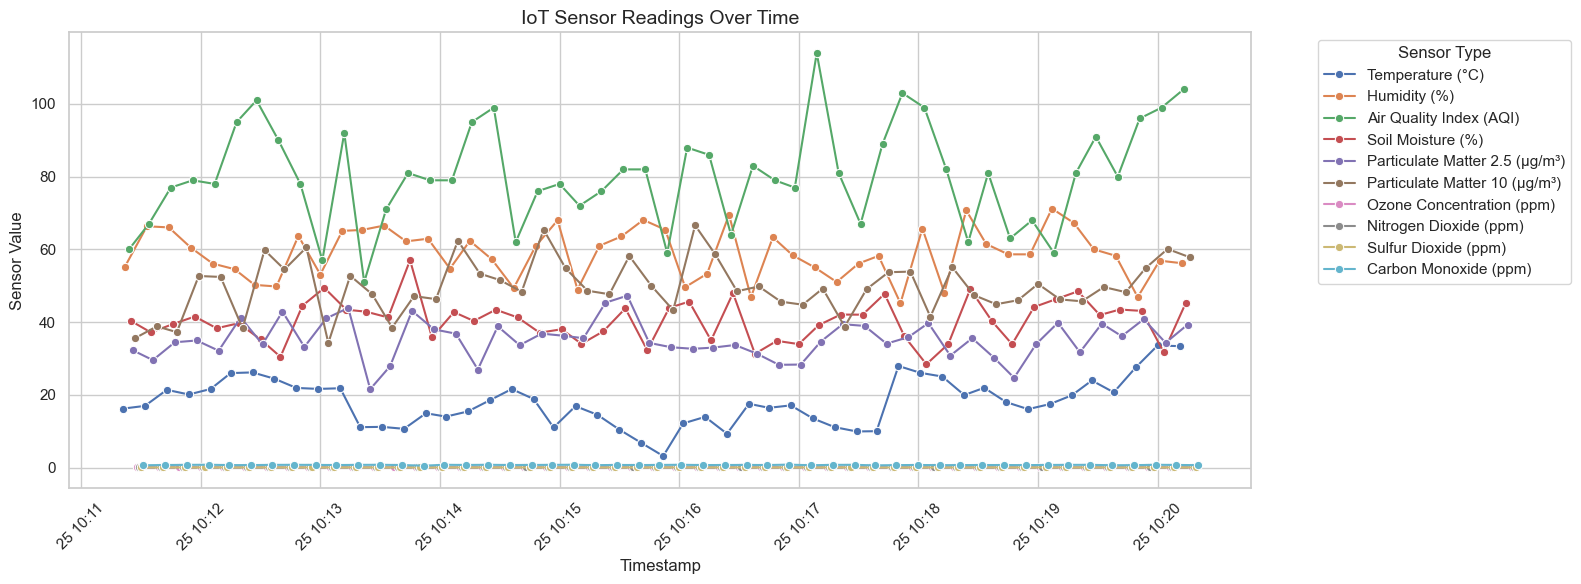

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean columns
df.columns = df.columns.str.strip()

# Select the sensor fields you want to include in the plot
sensor_fields = [
    'Temperature (°C)',
    'Humidity (%)',
    'Air Quality Index (AQI)',
    'Soil Moisture (%)',
    'Particulate Matter 2.5 (µg/m³)',
    'Particulate Matter 10 (µg/m³)',
    'Ozone Concentration (ppm)',
    'Nitrogen Dioxide (ppm)',
    'Sulfur Dioxide (ppm)',
    'Carbon Monoxide (ppm)'
]

df_filtered = df[df['data_type'].isin(sensor_fields)]

# Plot it!
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

sns.lineplot(
    data=df_filtered,
    x='timestamp',
    y='numeric_value',
    hue='data_type',
    marker='o'
)

# Rotate timestamps for readability
plt.xticks(rotation=45)

# Title and axis labels
plt.title("IoT Sensor Readings Over Time", fontsize=14)
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Sensor Value", fontsize=12)

# Push legend outside the plot
plt.legend(title="Sensor Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Make layout tighter
plt.tight_layout()

# Show the plot
plt.show()
